In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [35]:
df=pd.read_csv("C:\\Users\\swast\\Desktop\\verzeo internship\\outstanding projects\healthcare-dataset-stroke-data.csv")

In [36]:
df.head(50)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [37]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [38]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [39]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [40]:
df=df.dropna()
df.pop('id')

0        9046
2       31112
3       60182
4        1665
5       56669
        ...  
5104    14180
5106    44873
5107    19723
5108    37544
5109    44679
Name: id, Length: 4909, dtype: int64

In [41]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [42]:
df=df.dropna()

In [43]:
df2=pd.get_dummies(df, drop_first=True)
print(df2.head(20))
df2.columns

     age  hypertension  heart_disease  avg_glucose_level   bmi  stroke  \
0   67.0             0              1             228.69  36.6       1   
2   80.0             0              1             105.92  32.5       1   
3   49.0             0              0             171.23  34.4       1   
4   79.0             1              0             174.12  24.0       1   
5   81.0             0              0             186.21  29.0       1   
6   74.0             1              1              70.09  27.4       1   
7   69.0             0              0              94.39  22.8       1   
9   78.0             0              0              58.57  24.2       1   
10  81.0             1              0              80.43  29.7       1   
11  61.0             0              1             120.46  36.8       1   
12  54.0             0              0             104.51  27.3       1   
14  79.0             0              1             214.09  28.2       1   
15  50.0             1              0 

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke', 'gender_Male', 'gender_Other', 'ever_married_Yes',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

In [44]:
df.groupby(['stroke'],as_index=False).mean()

,stroke,age,hypertension,heart_disease,avg_glucose_level,bmi
0,0,41.760451,0.083191,0.043191,104.003736,28.823064
1,1,67.712919,0.287081,0.191388,134.571388,30.471292


this gives us a basic idea that usually one suffering from a heart attack is older, and are more likely to have had hyper tension , heart disease and a glucose level and BMI higher than people who havent had a stroke

In [45]:
df1=(df.groupby(['stroke']).gender.value_counts().unstack())
df_hd=(df.groupby(['heart_disease']).stroke.value_counts().unstack())
df_wtP=(df2.groupby(['work_type_Private']).stroke.value_counts().unstack())
df_ssfs=(df2.groupby(['smoking_status_formerly smoked']).stroke.value_counts().unstack())
df_sss=(df2.groupby(['smoking_status_smokes']).stroke.value_counts().unstack())
df_ht=(df2.groupby(['hypertension']).stroke.value_counts().unstack())


stroke            0    1
heart_disease           
0              4497  169
1               203   40
no heart disease subject having stroke has a chance of  3.621945992284612 %
 heart disease subject having stroke has a chance of  16.46090534979424 %


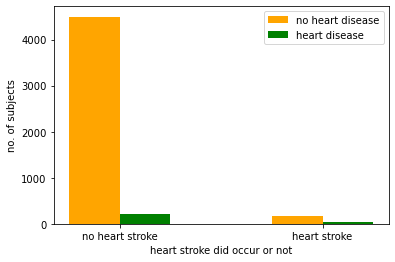

In [46]:
print(df_hd)
plt.bar(('no heart stroke','heart stroke'),list(df_hd.iloc[0,:].values),-0.25,color='orange',align='edge',label='no heart disease')
plt.bar(('no heart stroke','heart stroke'),list(df_hd.iloc[1,:].values),0.25,color='green',align='edge',label='heart disease')
plt.xlabel('heart stroke did occur or not')
plt.ylabel('no. of subjects')
plt.legend()
percent=(169/(169+4497))*100
percent1=(40/243)*100
print('no heart disease subject having stroke has a chance of ',percent , '%\n heart disease subject having stroke has a chance of ',percent1,'%')

here we are observing an expected trend where normally a person having a heart disease has about 16% chance to be struck by a heart stroke which is about 13% higher than a normal person.

stroke                0    1
work_type_Private           
0                  2016   82
1                  2684  127


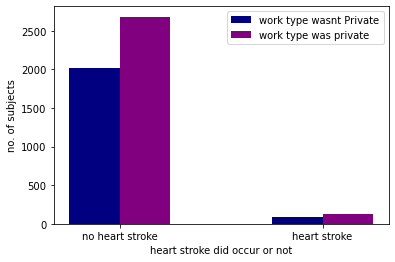

In [47]:
print(df_wtP)
plt.bar(('no heart stroke','heart stroke'),list(df_wtP.iloc[0,:].values),-0.25,color='navy',align='edge',label='work type wasnt Private')
plt.bar(('no heart stroke','heart stroke'),list(df_wtP.iloc[1,:].values),0.25,color='purple',align='edge',label='work type was private')
plt.xlabel('heart stroke did occur or not')
plt.ylabel('no. of subjects')
plt.legend()

stroke                             0    1
smoking_status_formerly smoked           
0                               3920  152
1                                780   57
stroke                    0    1
smoking_status_smokes           
0                      4002  170
1                       698   39


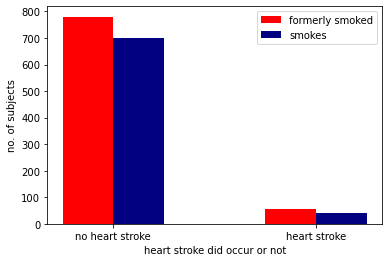

In [48]:
print(df_ssfs)
print(df_sss)
plt.bar(('no heart stroke','heart stroke'),list(df_ssfs.iloc[1,:].values),-0.25,color='red',align='edge',label='formerly smoked')
plt.bar(('no heart stroke','heart stroke'),list(df_sss.iloc[1,:].values),0.25,color='navy',align='edge',label='smokes')
plt.xlabel('heart stroke did occur or not')
plt.ylabel('no. of subjects')
plt.legend()

In [49]:
percent1=57/(780+57)
print(percent1)
percent2=39/(698+39)
print(percent2)

0.06810035842293907
0.052917232021709636


hence about 6.8 % of the subjects formerly smoking had a heart attack while 5.3% of the subjects who currently smoke have had a heart attack.

we could interpret that second hand smoking does seem to be much of a relevant factor in determining heart attack chances

stroke           0    1
hypertension           
0             4309  149
1              391   60
False    4458
True      451
Name: hypertension, dtype: int64


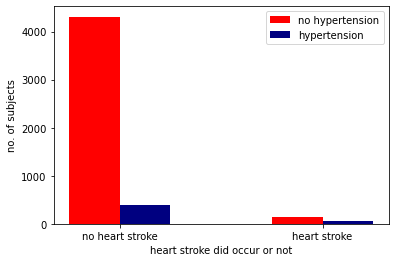

In [50]:
print(df_ht)
t=(df['hypertension']==1).value_counts()
print(t)
# from the data below : 
plt.bar(('no heart stroke','heart stroke'),list(df_ht.iloc[0,:].values),-0.25,color='red',align='edge',label='no hypertension')
plt.bar(('no heart stroke','heart stroke'),list(df_ht.iloc[1,:].values),0.25,color='navy',align='edge',label='hypertension')
plt.xlabel('heart stroke did occur or not')
plt.ylabel('no. of subjects')
plt.legend()


In [51]:
percent2=(149/4309)*100
percent=(60/451)*100
print(percent,' ',percent2)

13.303769401330376   3.4578788582037596


13.303769401330376 % people suffering from hyperrtension did have a heart stroke showing high likely hood of it related to strokes compared to  3.4578788582037596 % of people suffering from heart stroke while not suffering from hyper tension

In [52]:
df1

gender,Female,Male,Other
stroke,,,
0,2777.0,1922.0,1.0
1,120.0,89.0,NaN


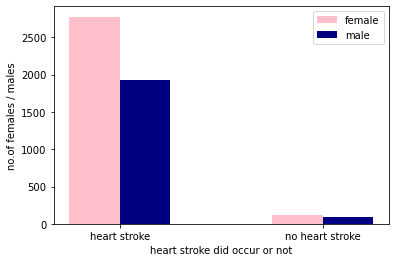

In [53]:
plt.bar(('heart stroke','no heart stroke'),list(df1.iloc[:,0].values),-0.25,color='pink',align='edge',label='female')
plt.bar(('heart stroke','no heart stroke'),list(df1.iloc[:,1].values),0.25,color='navy',align='edge',label='male')
plt.xlabel('heart stroke did occur or not')
plt.ylabel('no.of females / males')
plt.legend()

#### we could conclude hence that females are more likely to suffer with an heart attack compared to males.
others wasnt considered in this data as only 1 of the category was present , who hadnt suffered a heart attack.

0    1899
1     191
Name: stroke, dtype: int64
0    4700
1     209
Name: stroke, dtype: int64
9.138755980861243   4.257486249745366


Text(0.5, 0, 'age category')

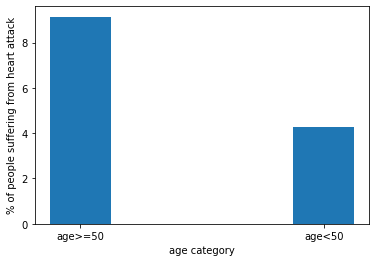

In [54]:
df_ab60=df[df['age']>=50]
c1=df_ab60.stroke.value_counts()
print(c1)
df_l60=df[df['stroke']<50]
c2=df_l60.stroke.value_counts()
print(c2)
percent1=(191/(1899+191))*100
percent2=(209/(209+4700))*100
print(percent1,' ',percent2)
plt.bar(['age>=50','age<50'],[percent1,percent2],0.25)
plt.ylabel('% of people suffering from heart attack')
plt.xlabel('age category')

this implies a higher percentage of the older population suffer from a stroke.
while about 4.25 % of people under age 50 suffer heart attack about 9.14% of older people suffer from it about a 5% increase

In [55]:
lst=[]
dtc = DecisionTreeClassifier(random_state=0)
x=(df2.iloc[:,[0,1,2,3,4,5,7,8,9,10,11,12,13,14,15,16]].values)
y=df2.iloc[:,5].values.reshape(-1,1)
y

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)
print(x_train)

[[68.  0.  0. ...  0.  1.  0.]
 [67.  1.  1. ...  0.  1.  0.]
 [82.  0.  1. ...  0.  0.  1.]
 ...
 [24.  1.  0. ...  0.  0.  1.]
 [ 9.  0.  0. ...  0.  0.  0.]
 [58.  0.  0. ...  0.  1.  0.]]


In [57]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [58]:
y_pred=dtc.predict(x_test)

In [59]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [60]:
y_test

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [61]:
accuracy_score(y_test,y_pred)
lst.append(accuracy_score(y_test,y_pred)*100)

In [62]:
log=LogisticRegression()
log.fit(x_train,y_train.ravel())
y_pred2=log.predict(x_test)
print(y_test)
print(y_pred2)
accuracy_score(y_test,y_pred2)
lst.append(accuracy_score(y_test,y_pred2)*100)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]
[0 0 0 ... 0 0 0]


C:\Users\swast\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [63]:
rfc=RandomForestClassifier(random_state=0)
svc=SVC(kernel='rbf',random_state=0)

In [64]:
rfc.fit(x_train,y_train.ravel())
svc.fit(x_train,y_train.ravel())

SVC(random_state=0)

In [65]:
print(rfc.score(x_test,y_test))
lst.append(rfc.score(x_test,y_test)*100)
y_pred3=svc.predict(x_test)
print(accuracy_score(y_test,y_pred3))
lst.append(accuracy_score(y_test,y_pred3)*100)

1.0
0.9600977198697068


[100.0, 100.0, 100.0, 96.00977198697068]


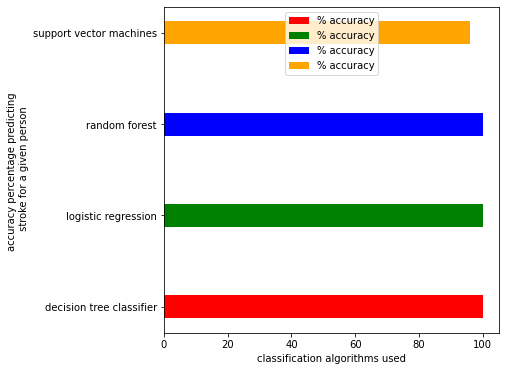

In [66]:
algorithms_used= ['decision tree classifier','logistic regression','random forest','support vector machines']
labels=list(algorithms_used)
print(list(lst))
colors = ['red', 'green', 'blue', 'orange']
plt.subplots(figsize=(6,6))
i=0
while i<=3:
    plt.barh(labels[i],lst[i],0.25,align='center',color=colors[i],label='% accuracy')
    i=i+1
plt.legend(loc='upper center') 
plt.xlabel('classification algorithms used')
plt.ylabel('accuracy percentage predicting \n stroke for a given person')
plt.show()